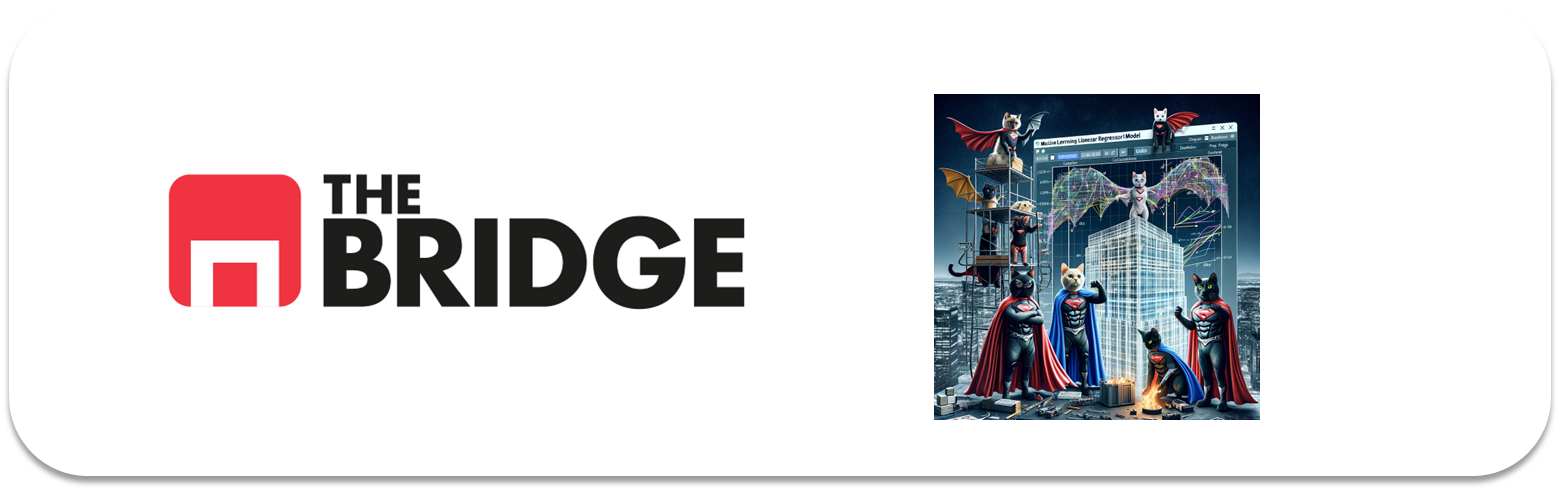

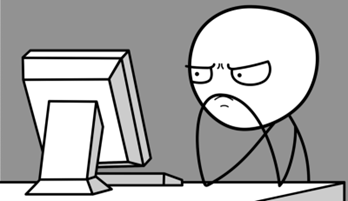

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
df_iris = pd.read_csv('C:/Users/franc/AppData/Local/Programs/Python/Python312/Lib/site-packages/sklearn/datasets/data/iris.csv', header= None) # he encontrado el directorio a traves del CMD
df_iris

,0,1,2,3,4
0,150.0,4.0,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [6]:
target_dict = {
    0: 'Iris-Setosa',
    1: 'Iris-Versicolour',
    2: 'Iris-Virginica'
}

In [7]:
df_iris = df_iris.drop(index= 0)
columnas = ['sepal_lenght_cm', 'sepal_width_cm', 'petal_lenght_cm', 'petal_width_cm', 'class_target']
df_iris.columns = columnas
df_iris.head()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm,class_target
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [8]:
df_iris.info() # hay que pasar 3 columnas a numericas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_lenght_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_lenght_cm  150 non-null    object 
 3   petal_width_cm   150 non-null    object 
 4   class_target     150 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [9]:
for col in df_iris.columns:
    df_iris[col] = df_iris[col].astype(float)

In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_lenght_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_lenght_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class_target     150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
df_iris.describe()
# los describe encajan a la perfeccion con los dados en el DESCR anteriormente, el dataframe esta correcto

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm,class_target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [12]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_lenght_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_lenght_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class_target     150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [13]:
df_iris.head(2)

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm,class_target
1,5.1,3.5,1.4,0.2,0.0
2,4.9,3.0,1.4,0.2,0.0


In [14]:
df_iris['class_target'].value_counts(normalize= True) # estan igual de repartidos todos los tipos

class_target
0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: proportion, dtype: float64

In [15]:
df_iris.class_target = df_iris['class_target'].map(target_dict) # voy a mapearlo, prefiero tener la columna con los nombres en vez de los numeros

In [16]:
df_iris.head()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm,class_target
1,5.1,3.5,1.4,0.2,Iris-Setosa
2,4.9,3.0,1.4,0.2,Iris-Setosa
3,4.7,3.2,1.3,0.2,Iris-Setosa
4,4.6,3.1,1.5,0.2,Iris-Setosa
5,5.0,3.6,1.4,0.2,Iris-Setosa


In [17]:
df_iris['class_target'].value_counts(normalize= True) # estan igual de repartidos todos los tipos

class_target
Iris-Setosa         0.333333
Iris-Versicolour    0.333333
Iris-Virginica      0.333333
Name: proportion, dtype: float64

In [18]:
df_iris.head(7)

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm,class_target
1,5.1,3.5,1.4,0.2,Iris-Setosa
2,4.9,3.0,1.4,0.2,Iris-Setosa
3,4.7,3.2,1.3,0.2,Iris-Setosa
4,4.6,3.1,1.5,0.2,Iris-Setosa
5,5.0,3.6,1.4,0.2,Iris-Setosa
6,5.4,3.9,1.7,0.4,Iris-Setosa
7,4.6,3.4,1.4,0.3,Iris-Setosa


### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


In [26]:
train_set, test_set = model_selection.train_test_split(df_iris, test_size= 0.2, stratify= df_iris["class_target"], random_state= 42)

scaler = StandardScaler()

In [30]:
features = ['sepal_lenght_cm', 'sepal_width_cm', 'petal_lenght_cm', 'petal_width_cm']
scaler.fit(train_set[features])

x_train = pd.DataFrame(scaler.transform(train_set[features]), columns= features)
x_test = pd.DataFrame(scaler.transform(test_set[features]), columns= features)
x_train.describe()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.369275e-16,9.992007e-16,1.665335e-17,1.702342e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.840983e+00,-2.347097e+00,-1.516067e+00,-1.454945e+00
25%,-8.856620e-01,-5.559895e-01,-1.232159e+00,-1.191606e+00
50%,-1.094638e-01,-1.082127e-01,2.725514e-01,1.250858e-01
75%,6.667343e-01,6.194245e-01,7.551944e-01,7.834318e-01
max,2.457961e+00,3.026225e+00,1.777262e+00,1.705116e+00


<Figure size 500x500 with 0 Axes>

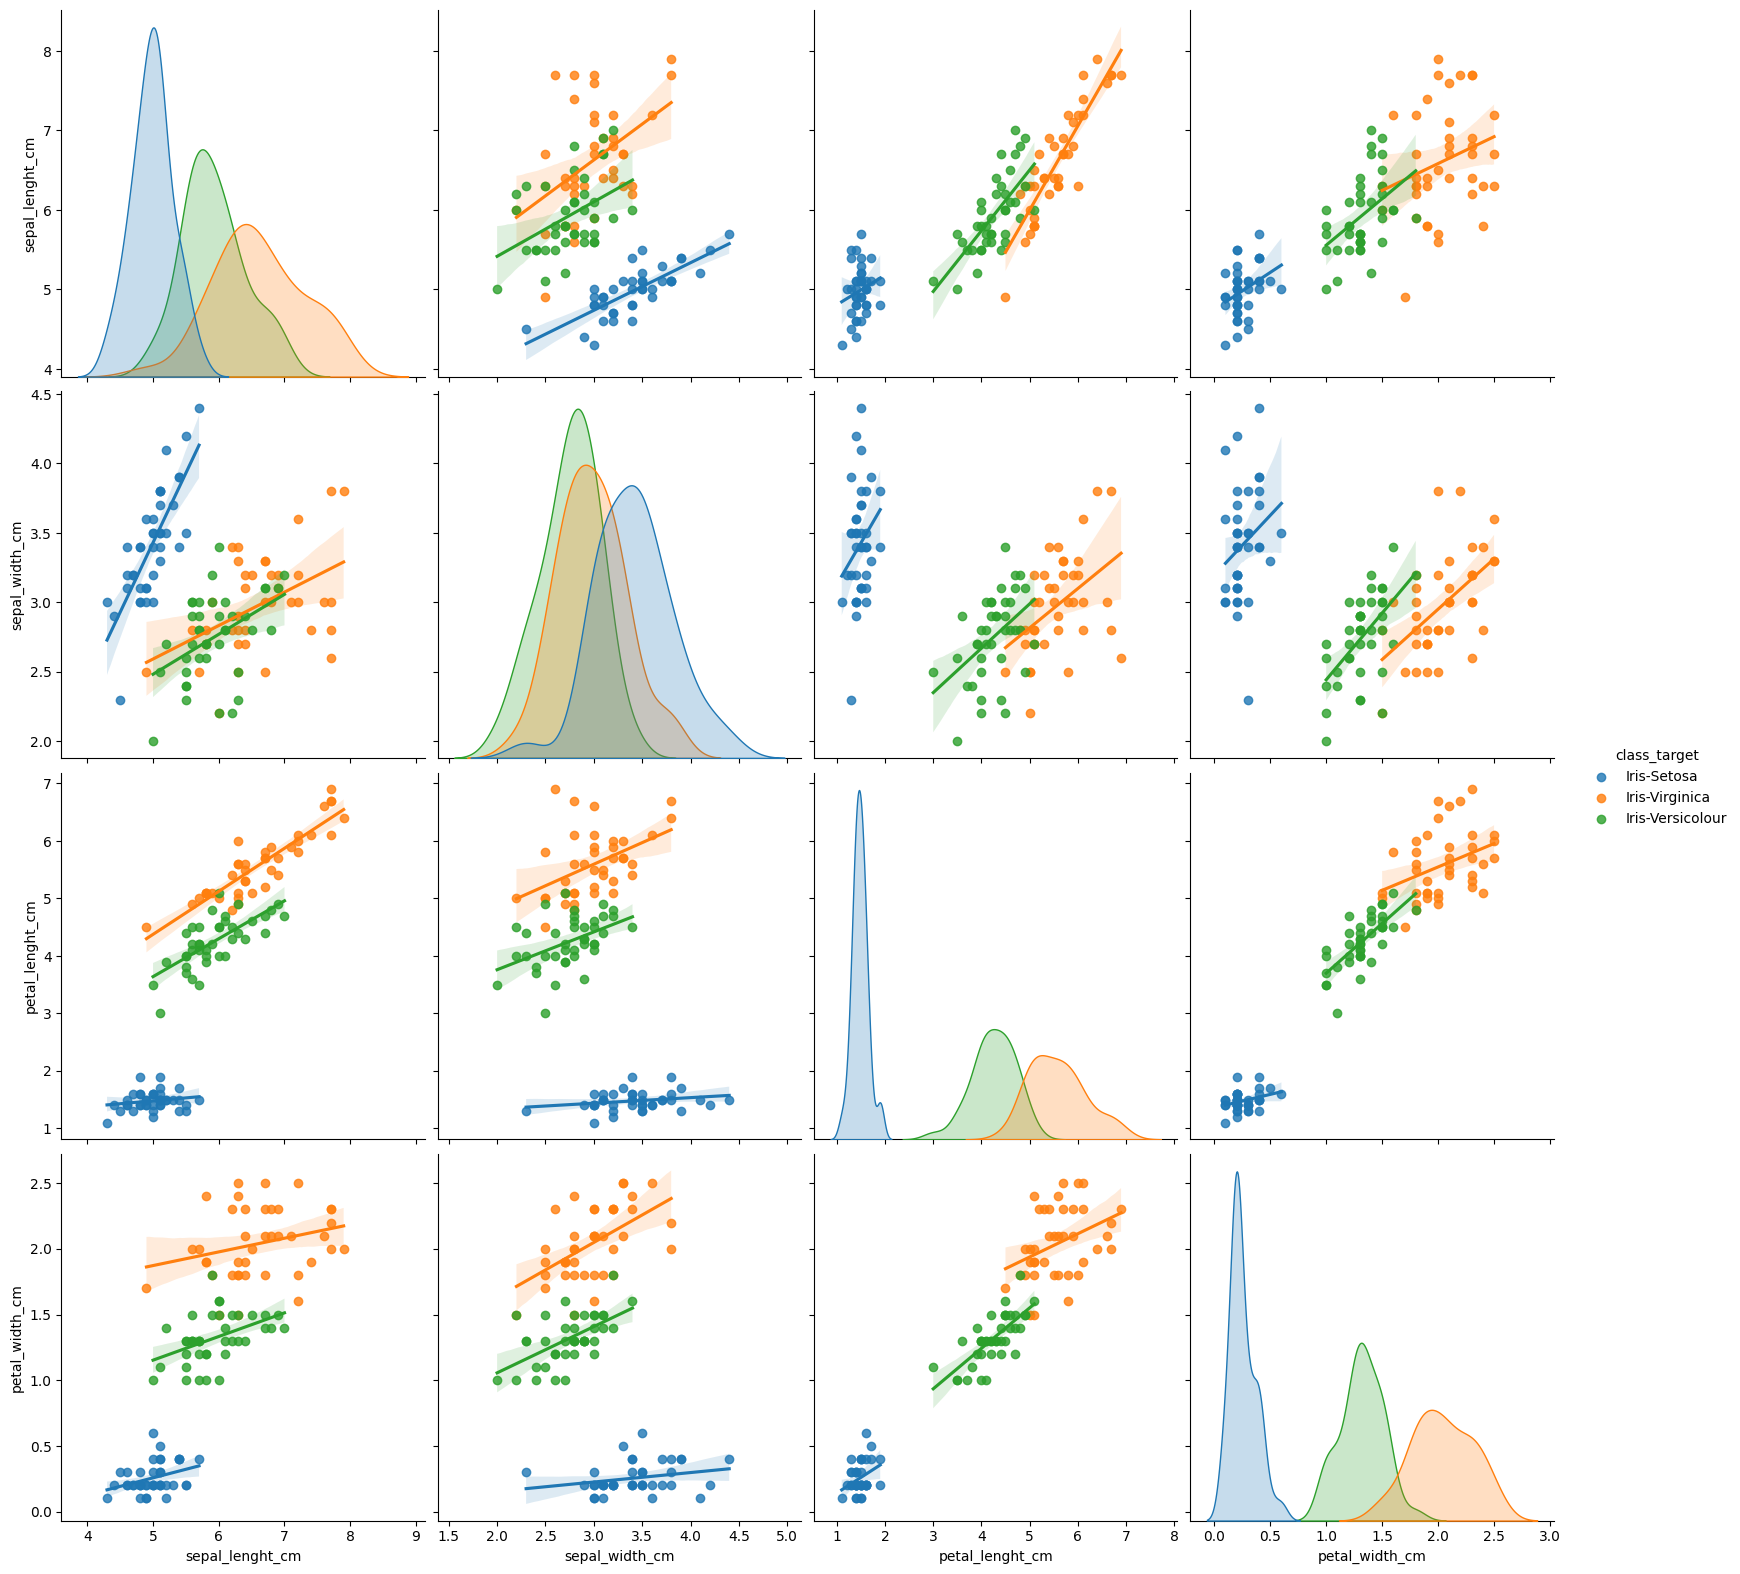

In [33]:
# esto no lo pide pero quiero verlo yo

sns.pairplot(train_set,
            hue='class_target',
            height=4,
            vars=features,
            kind='reg'); # "reg" de regresión lineal

### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [34]:
y_train = train_set['class_target']
y_test = test_set['class_target']

In [35]:
clf = linear_model.LogisticRegression()

clf.fit(x_train, y_train)

LogisticRegression()

In [36]:
clf.coef_

array([[-1.08894494,  1.02420763, -1.79905609, -1.68622819],
       [ 0.53633654, -0.36048698, -0.20407418, -0.80795703],
       [ 0.5526084 , -0.66372065,  2.00313027,  2.49418523]])

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [37]:
clf.predict(x_train)

array(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour',
       'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica',
       'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Virginica',
       'Iris-Virginica', 'Iris-Virginica', 'Iris-Versicolour',
       'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Versicolour',
       'Iris-Setosa', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica',
       'Iris-Setosa', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Virginica',
       'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica',
       'Iris-Virginica', 'Iris-Setosa', 'Iris-Virginica', 'Iris-Setosa',
       'Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour',
       'Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica',
       'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Virginica',
       'Iris-Virginica', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Setosa',
       'Iris-Virginica', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Virginica',
       'Iris-Setosa', 'Iris-Setosa', 'Iris-Setosa', 'Iris-Setosa',
  

In [48]:
y_pred = clf.predict(x_train)

In [41]:
clf.predict_proba(x_train)

array([[9.68708219e-01, 3.12911289e-02, 6.52025360e-07],
       [1.85428878e-02, 5.12905465e-01, 4.68551648e-01],
       [1.89064496e-03, 7.64502150e-01, 2.33607205e-01],
       [9.57193246e-01, 4.28061773e-02, 5.77035483e-07],
       [2.52756356e-02, 8.96907224e-01, 7.78171405e-02],
       [2.32069884e-04, 1.92589858e-01, 8.07178072e-01],
       [3.17579772e-02, 8.82214794e-01, 8.60272292e-02],
       [2.62909291e-03, 5.93399425e-01, 4.03971482e-01],
       [1.24052132e-06, 1.42238586e-02, 9.85774901e-01],
       [1.20642899e-05, 1.77654278e-02, 9.82222508e-01],
       [1.53574007e-06, 1.80991196e-02, 9.81899345e-01],
       [1.41401395e-02, 7.59444137e-01, 2.26415724e-01],
       [3.33630875e-02, 9.50016821e-01, 1.66200912e-02],
       [3.56353345e-02, 9.42283590e-01, 2.20810758e-02],
       [2.23757851e-02, 9.28603662e-01, 4.90205533e-02],
       [9.73384294e-01, 2.66151209e-02, 5.84667354e-07],
       [9.90603465e-01, 9.39634673e-03, 1.88627841e-07],
       [3.56761002e-05, 1.18299

In [49]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), index= [f'Real {i}' for i in clf.classes_], columns= [f'Predicho {i}' for i in clf.classes_])
cm

,Predicho Iris-Setosa,Predicho Iris-Versicolour,Predicho Iris-Virginica
Real Iris-Setosa,40,0,0
Real Iris-Versicolour,0,38,2
Real Iris-Virginica,0,3,37


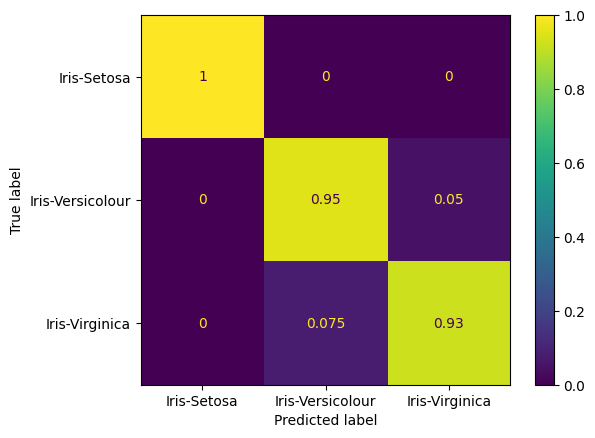

In [51]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize= 'true');

In [53]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        40
Iris-Versicolour       0.93      0.95      0.94        40
  Iris-Virginica       0.95      0.93      0.94        40

        accuracy                           0.96       120
       macro avg       0.96      0.96      0.96       120
    weighted avg       0.96      0.96      0.96       120



### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [55]:
y_pred = clf.predict(x_test)

cm_1 = pd.DataFrame(confusion_matrix(y_test, y_pred), index= [f'Real {i}' for i in clf.classes_], columns= [f'Real {i}' for i in clf.classes_])
cm_1

,Real Iris-Setosa,Real Iris-Versicolour,Real Iris-Virginica
Real Iris-Setosa,10,0,0
Real Iris-Versicolour,0,9,1
Real Iris-Virginica,0,1,9


In [56]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        10
Iris-Versicolour       0.90      0.90      0.90        10
  Iris-Virginica       0.90      0.90      0.90        10

        accuracy                           0.93        30
       macro avg       0.93      0.93      0.93        30
    weighted avg       0.93      0.93      0.93        30



### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [57]:
for i in clf.coef_:
    print(i)

[-1.08894494  1.02420763 -1.79905609 -1.68622819]
[ 0.53633654 -0.36048698 -0.20407418 -0.80795703]
[ 0.5526084  -0.66372065  2.00313027  2.49418523]


In [58]:
clf.classes_

array(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], dtype=object)

In [59]:
pd.DataFrame(clf.coef_, index= clf.classes_, columns= features) # creo que es asi lo que piden, aunque me confundo aqui

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm
Iris-Setosa,-1.088945,1.024208,-1.799056,-1.686228
Iris-Versicolour,0.536337,-0.360487,-0.204074,-0.807957
Iris-Virginica,0.552608,-0.663721,2.003130,2.494185


### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

In [74]:
def show_coefs(model, figsize=(10, 5)):

    for i in range(len(clf.coef_)):

        df_coef = pd.DataFrame(clf.coef_[i], index=model.feature_names_in_, columns=["coefs"])

        print(f'\n{clf.classes_[i]}', df_coef, sep= '\n')

        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
        fig.suptitle(f"Model Coefficients {clf.classes_[i]}")

        fig.tight_layout()

        


Iris-Setosa
                    coefs
sepal_lenght_cm -1.088945
sepal_width_cm   1.024208
petal_lenght_cm -1.799056
petal_width_cm  -1.686228

Iris-Versicolour
                    coefs
sepal_lenght_cm  0.536337
sepal_width_cm  -0.360487
petal_lenght_cm -0.204074
petal_width_cm  -0.807957

Iris-Virginica
                    coefs
sepal_lenght_cm  0.552608
sepal_width_cm  -0.663721
petal_lenght_cm  2.003130
petal_width_cm   2.494185


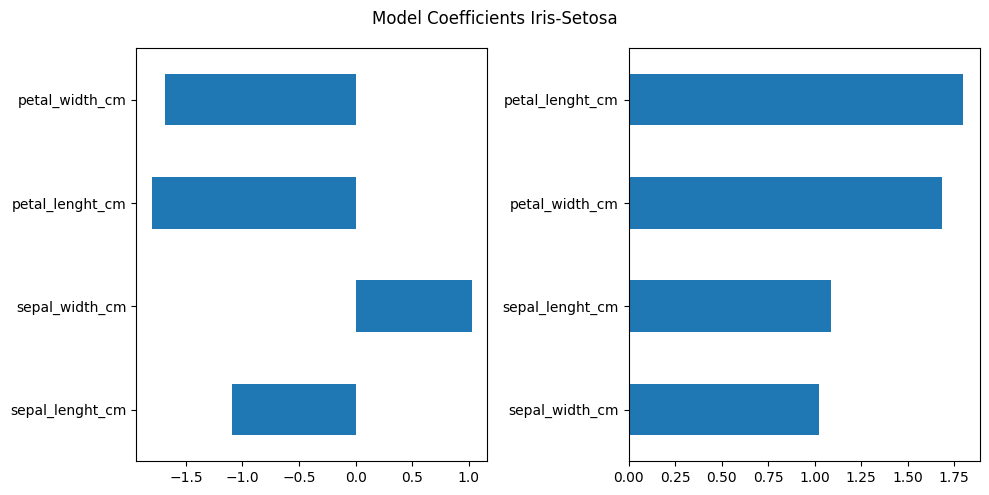

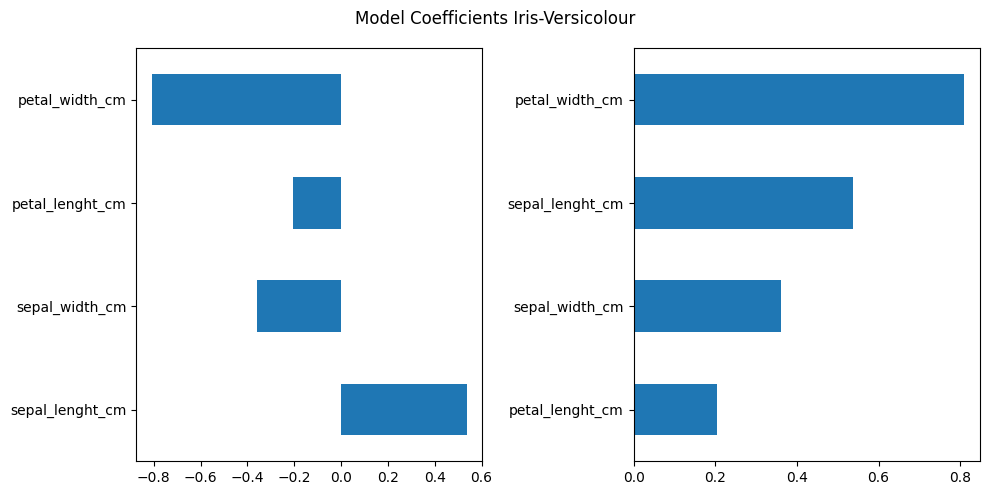

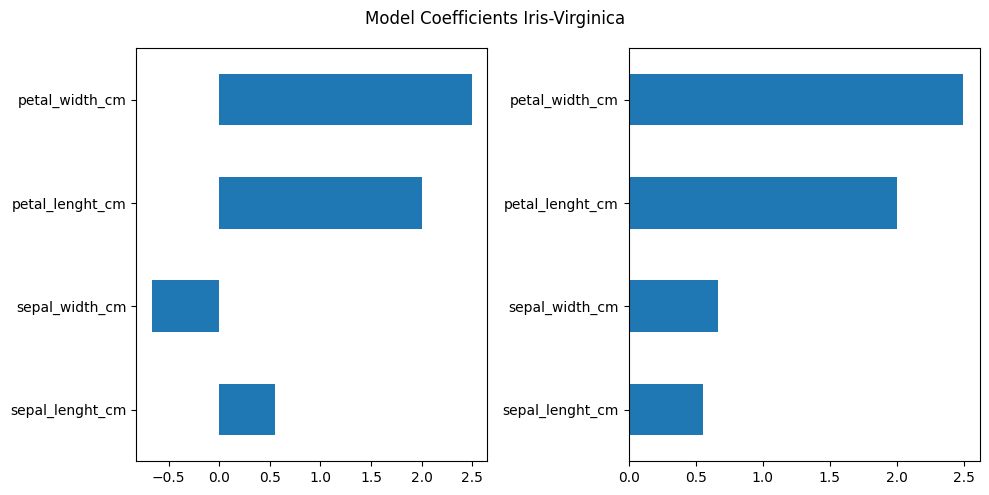

In [75]:
show_coefs(clf)